In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [59]:
data = pd.read_csv("paper_metadata.csv")
data.shape
# data["domain"].value_counts()

(3391, 19)

In [60]:
physics_domains = ["astro-ph", "cond-mat", "gr-qc", "hep-ex", "hep-lat", "hep-ph", "hep-th", "math-ph", "nlin", "quant-ph"]
data["domain"] = data["domain"].replace(physics_domains, "physics")

data["domain"].value_counts()

domain
cs         1325
math        848
stat        495
eess        319
econ        264
physics     116
q-bio        13
q-fin        11
Name: count, dtype: int64

In [61]:
print(data.columns)
parameters = ["word_count", "avg_sentence_length", "flesch_reading_ease", "gunning_fog", "smog_index"]

Index(['paper_id', 'arxiv_id', 'text_path', 'equation_path', 'domain', 'year',
       'word_count', 'sentence_count', 'avg_sentence_length',
       'flesch_reading_ease', 'gunning_fog', 'smog_index', 'title', 'authors',
       'published_date', 'primary_category', 'categories', 'doi',
       'journal_ref'],
      dtype='object')


In [62]:
def read_text_file(text_path):
    try:
        with open(text_path, "r", encoding="utf-8") as file:
            return file.read()
    except Exception as e:
        return None

# Apply the function to read text files
data["extracted_text"] = data["text_path"].apply(lambda x: read_text_file(x) if pd.notna(x) else None)

# Function to process equations CSV (if needed for later analysis)
def process_equation_csv(equation_path):
    try:
        df_eq = pd.read_csv(equation_path)
        return len(df_eq)  # Returning count of equations for each paper
    except Exception as e:
        return 0

# Apply the function to count equations per paper
data["equation_count"] = data["equation_path"].apply(lambda x: process_equation_csv(x) if pd.notna(x) else 0)


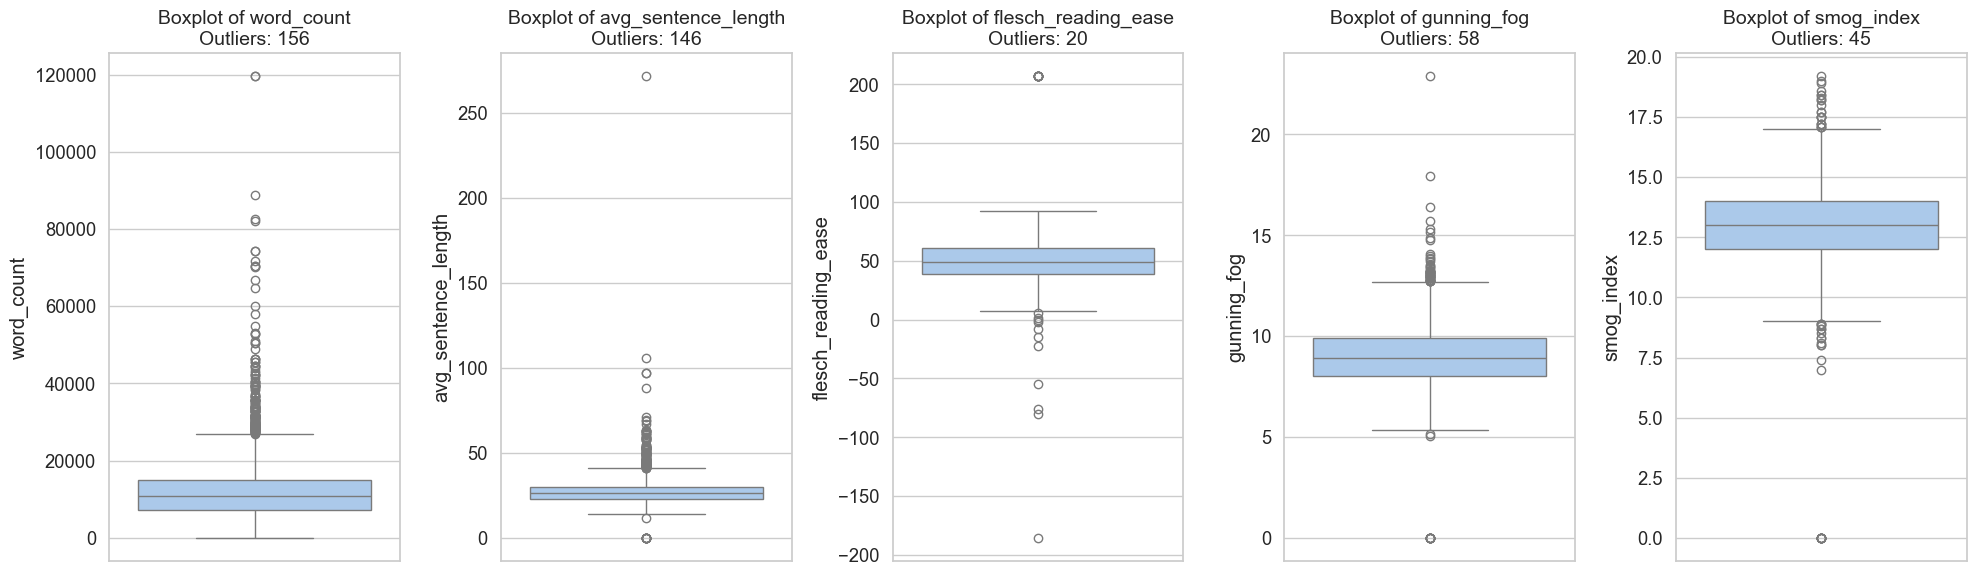


===== Overall Descriptive Statistics with Outliers =====
                      count          mean          std     min          25%  \
word_count           3391.0  12451.212917  8558.278538    0.00  7239.000000   
avg_sentence_length  3391.0     27.394835     8.355632    0.00    22.842829   
flesch_reading_ease  3391.0     50.049794    17.573845 -185.41    38.920000   
gunning_fog          3391.0      8.994503     1.557509    0.00     8.010000   
smog_index           3391.0     12.990593     1.738588    0.00    12.000000   

                              50%           75%            max  outlier_count  
word_count           10758.000000  15100.000000  119574.000000            156  
avg_sentence_length     26.090686     30.146884     271.421053            146  
flesch_reading_ease     48.700000     60.750000     206.840000             20  
gunning_fog              8.910000      9.890000      22.890000             58  
smog_index              13.000000     14.000000      19.200000     

In [63]:
## Descriptive statistics/outliers

# Function to compute IQR and find outliers
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Dictionary to store outlier counts
outlier_counts = {}

# Set Seaborn theme for better visualization
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Plot boxplots and find outliers
fig, axes = plt.subplots(1, len(parameters), figsize=(20, 6))

for i, param in enumerate(parameters):
    outliers, lower, upper = find_outliers_iqr(data, param)
    outlier_counts[param] = len(outliers)
    
    # Boxplot for each parameter
    sns.boxplot(data=data, y=param, ax=axes[i])
    axes[i].set_title(f"Boxplot of {param}\nOutliers: {len(outliers)}", fontsize=14)
    axes[i].set_ylabel(param)

plt.tight_layout()
plt.show()

# Compute descriptive statistics for overall data
desc_stats = data[parameters].describe().T

# Add outlier counts to descriptive statistics
desc_stats["outlier_count"] = desc_stats.index.map(outlier_counts)

# Compute descriptive statistics grouped by 'domain'
grouped_desc_stats = data.groupby("domain")[parameters].describe()

# Print overall descriptive statistics
print("\n===== Overall Descriptive Statistics with Outliers =====")
print(desc_stats)

# Print grouped descriptive statistics by domain
print("\n===== Descriptive Statistics Grouped by Domain =====")
print(grouped_desc_stats)

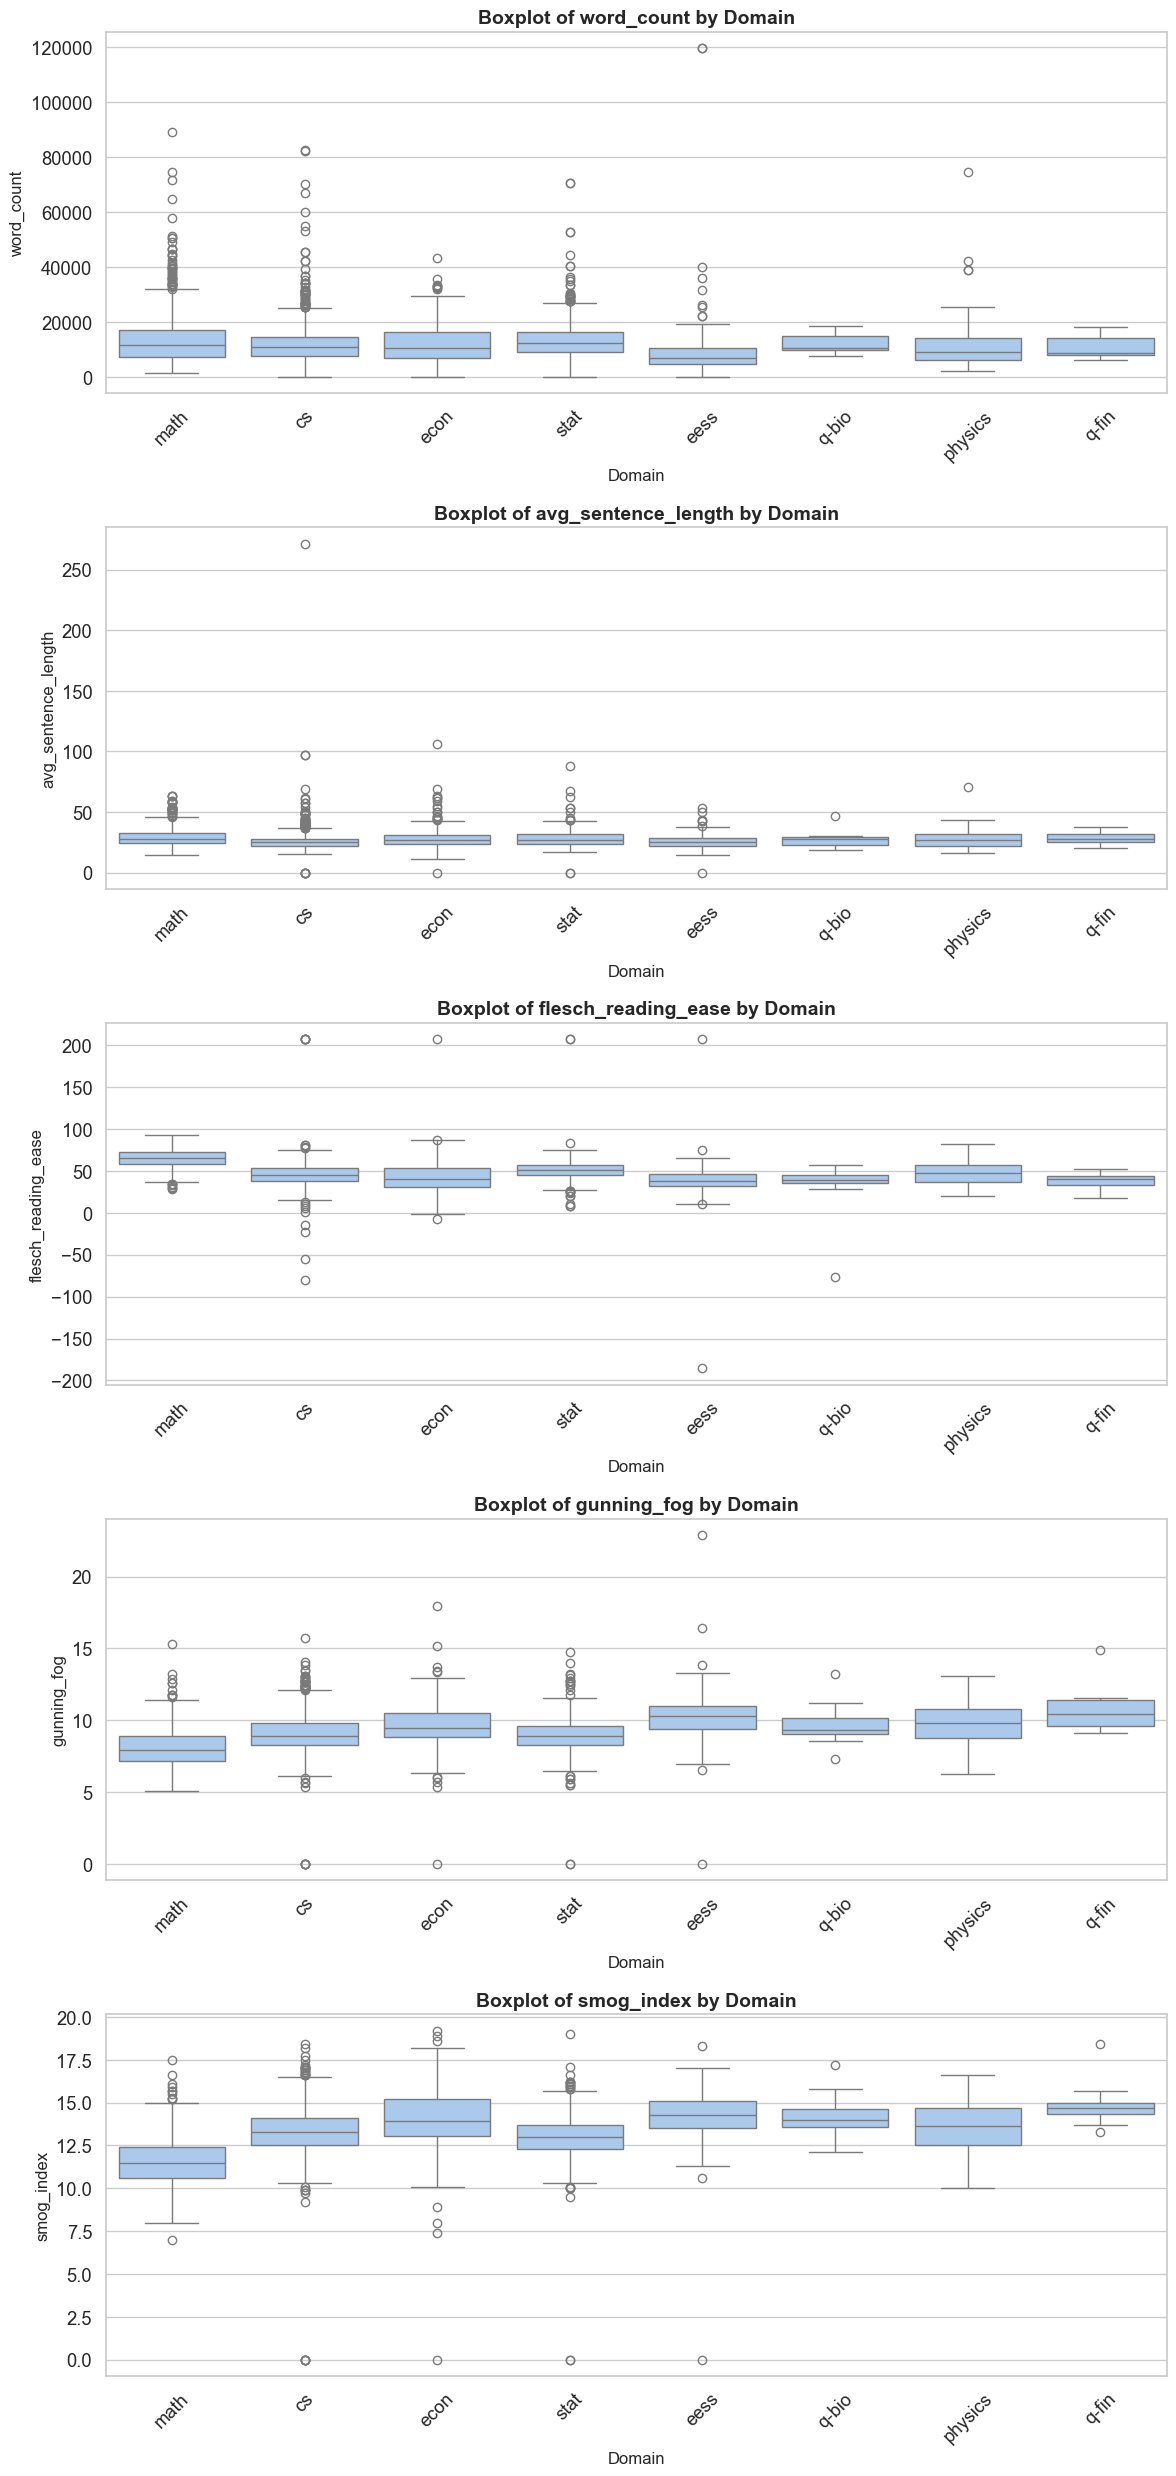

In [64]:
# Create boxplots for each parameter, grouped by domain
fig, axes = plt.subplots(len(parameters), 1, figsize=(12, 5 * len(parameters)))

for i, param in enumerate(parameters):
    sns.boxplot(data=data, x="domain", y=param, ax=axes[i])
    axes[i].set_title(f"Boxplot of {param} by Domain", fontsize=14, weight="bold")
    axes[i].set_xlabel("Domain", fontsize=12)
    axes[i].set_ylabel(param, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

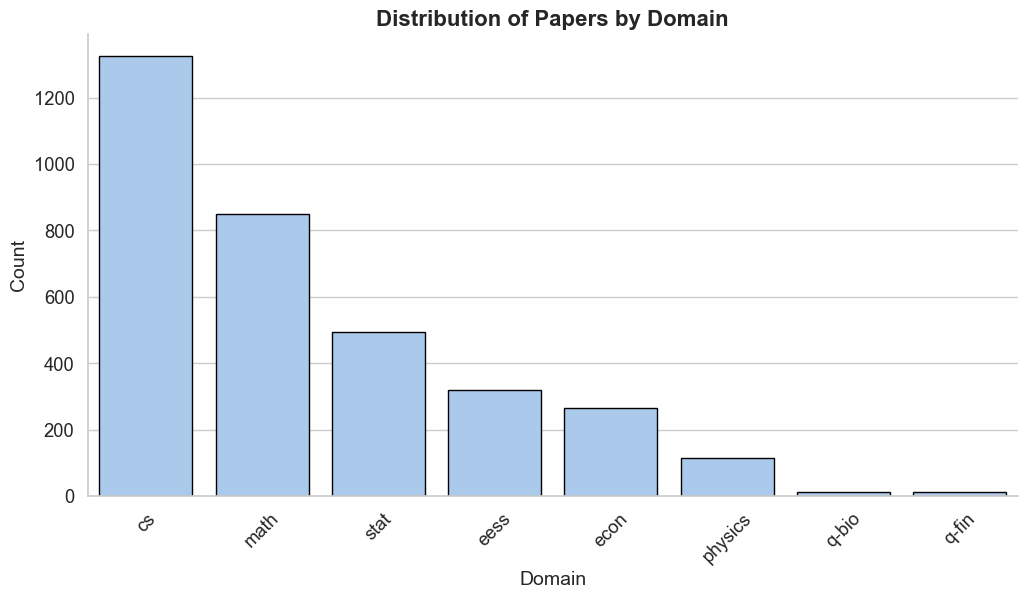

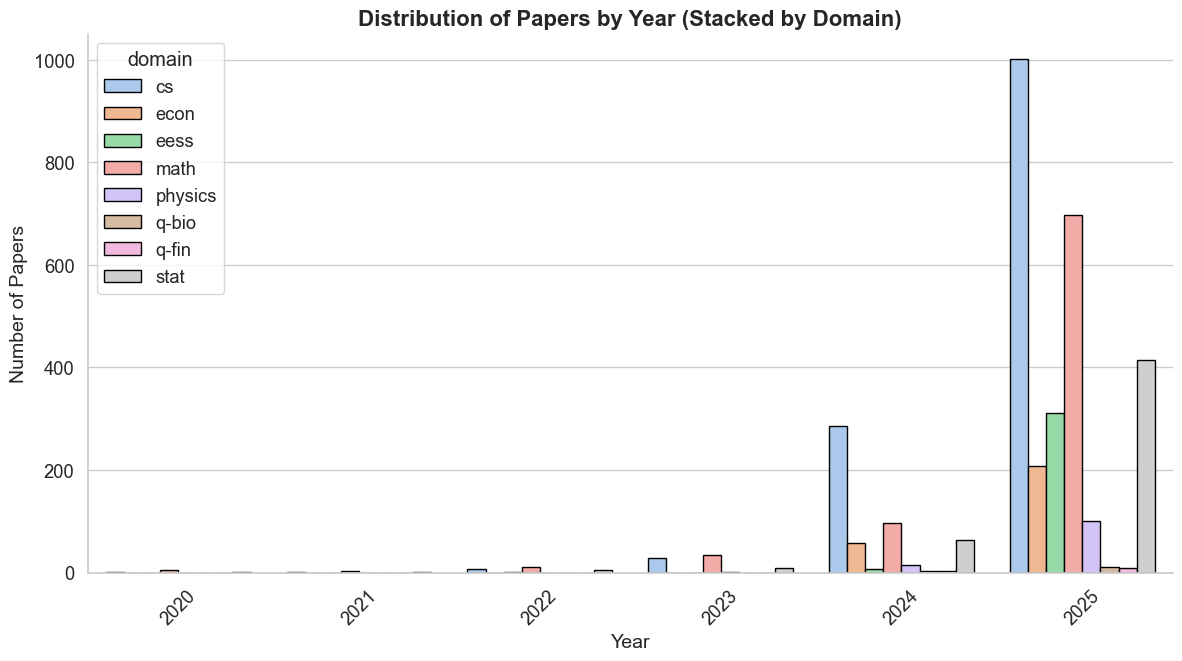

<Figure size 1200x600 with 0 Axes>

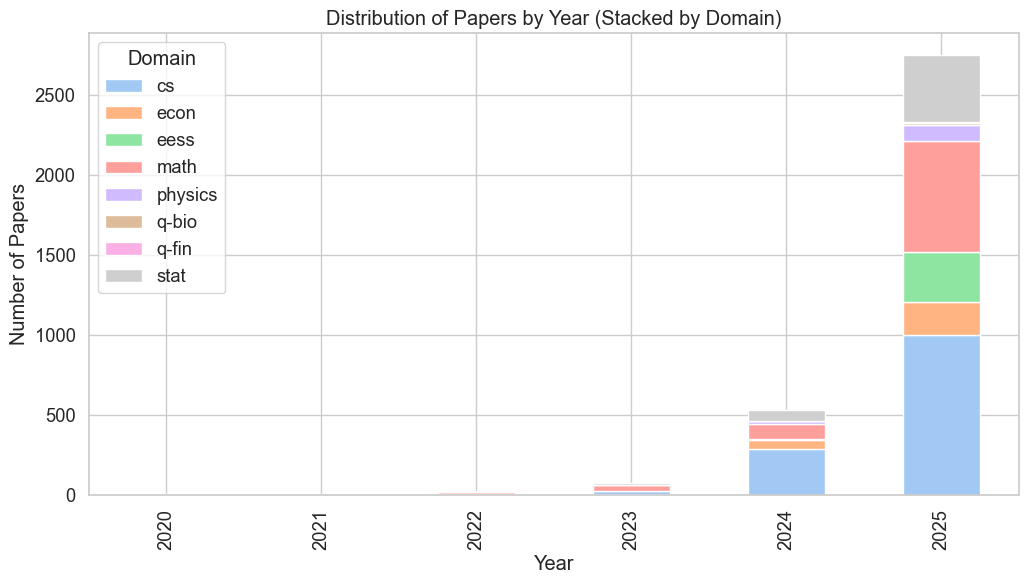

/var/folders/wt/ynq46c2s361fmn0v8y7fqhp40000gn/T/ipykernel_66515/2061785080.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="domain", y="word_count", estimator="mean", ci=None, edgecolor="black")


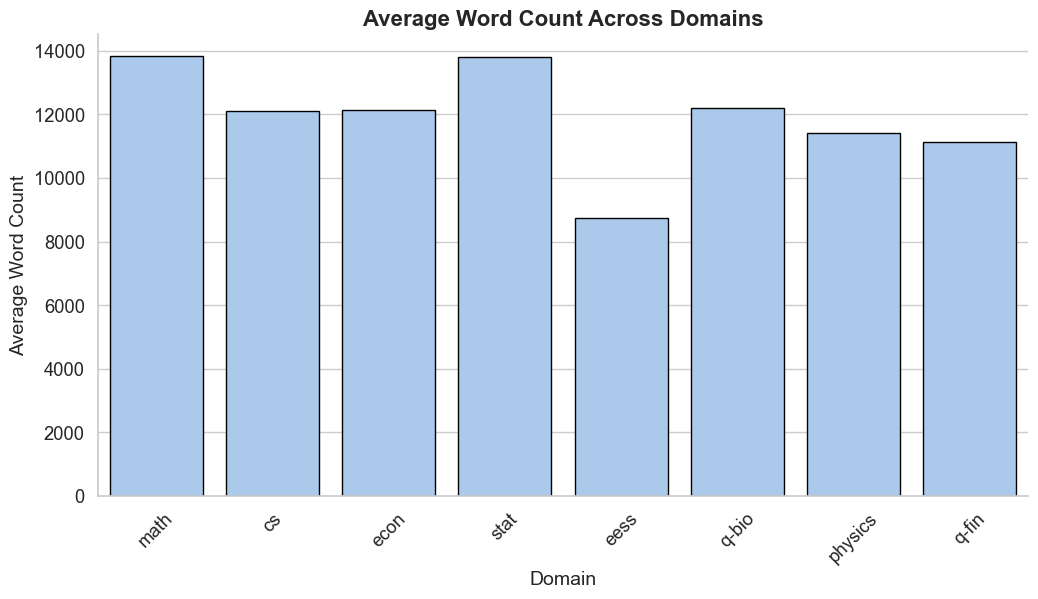

/var/folders/wt/ynq46c2s361fmn0v8y7fqhp40000gn/T/ipykernel_66515/2061785080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="domain", y="avg_sentence_length", estimator="mean", ci=None, edgecolor="black")


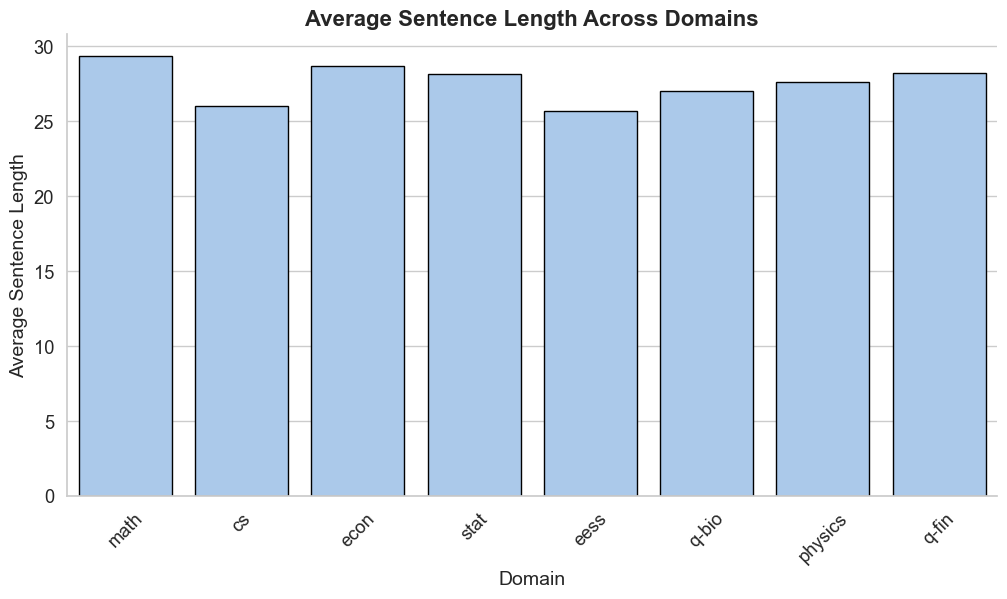

/var/folders/wt/ynq46c2s361fmn0v8y7fqhp40000gn/T/ipykernel_66515/2061785080.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, x="domain", y="flesch_reading_ease", estimator="mean", ci=None, edgecolor="black")


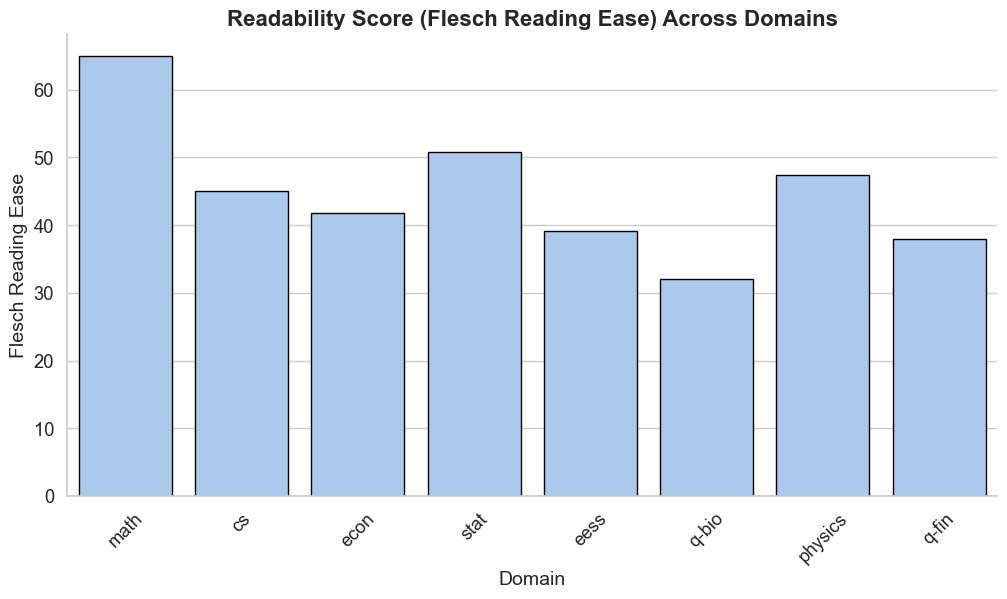

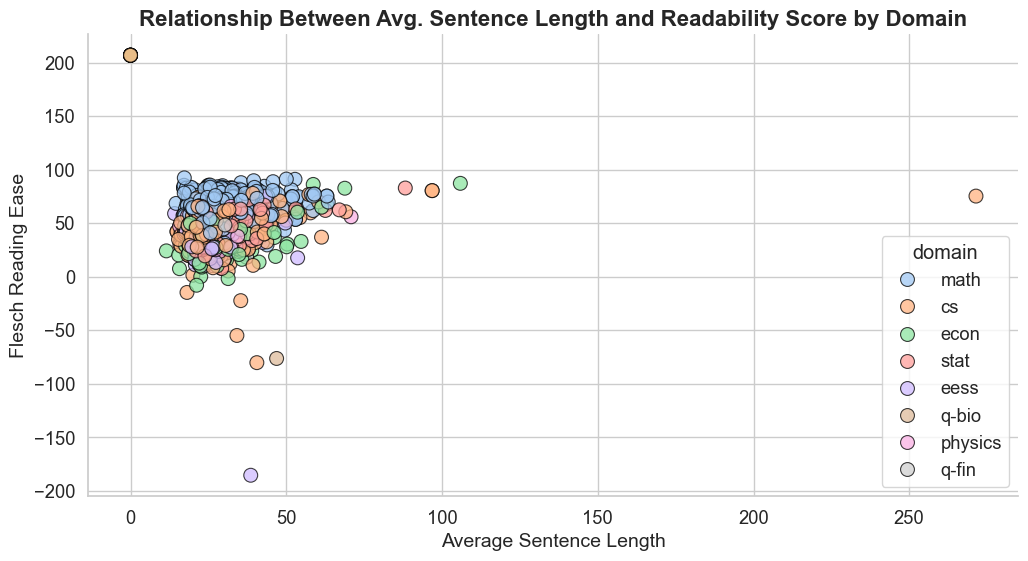

In [65]:
# Set a modern Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

### 1. Distribution of Papers by Domain ###
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x="domain", order=data["domain"].value_counts().index, edgecolor="black")
ax.set_title("Distribution of Papers by Domain", fontsize=16, weight='bold')
ax.set_xlabel("Domain", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### 2. Distribution of Papers by Year (Stacked by Domain) ###
df_year_domain = data.groupby(["year", "domain"]).size().unstack().fillna(0)
df_year_domain = df_year_domain.reset_index().melt(id_vars="year", var_name="domain", value_name="count")

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_year_domain, x="year", y="count", hue="domain", edgecolor="black")
ax.set_title("Distribution of Papers by Year (Stacked by Domain)", fontsize=16, weight='bold')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Papers", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### 2. alt fig. Distribution of papers by year (stacked by domain)
plt.figure(figsize=(12, 6))
df_year_domain = data.groupby(["year", "domain"]).size().unstack().fillna(0)
df_year_domain.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Distribution of Papers by Year (Stacked by Domain)")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.legend(title="Domain")
plt.show()

### 3. Average Word Count Across Domains ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x="domain", y="word_count", estimator="mean", ci=None, edgecolor="black")
ax.set_title("Average Word Count Across Domains", fontsize=16, weight='bold')
ax.set_xlabel("Domain", fontsize=14)
ax.set_ylabel("Average Word Count", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### 4. Average Sentence Length Across Domains ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x="domain", y="avg_sentence_length", estimator="mean", ci=None, edgecolor="black")
ax.set_title("Average Sentence Length Across Domains", fontsize=16, weight='bold')
ax.set_xlabel("Domain", fontsize=14)
ax.set_ylabel("Average Sentence Length", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### 5. Readability Score (Flesch Reading Ease) Across Domains ###
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x="domain", y="flesch_reading_ease", estimator="mean", ci=None, edgecolor="black")
ax.set_title("Readability Score (Flesch Reading Ease) Across Domains", fontsize=16, weight='bold')
ax.set_xlabel("Domain", fontsize=14)
ax.set_ylabel("Flesch Reading Ease", fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.show()

### 6. Relationship Between Avg Sentence Length, Readability Score, and Domains ###
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(
    data=data, x="avg_sentence_length", y="flesch_reading_ease", hue="domain", alpha=0.75, s=100, edgecolor="black"
)
ax.set_title("Relationship Between Avg. Sentence Length and Readability Score by Domain", fontsize=16, weight='bold')
ax.set_xlabel("Average Sentence Length", fontsize=14)
ax.set_ylabel("Flesch Reading Ease", fontsize=14)
sns.despine()
plt.show()

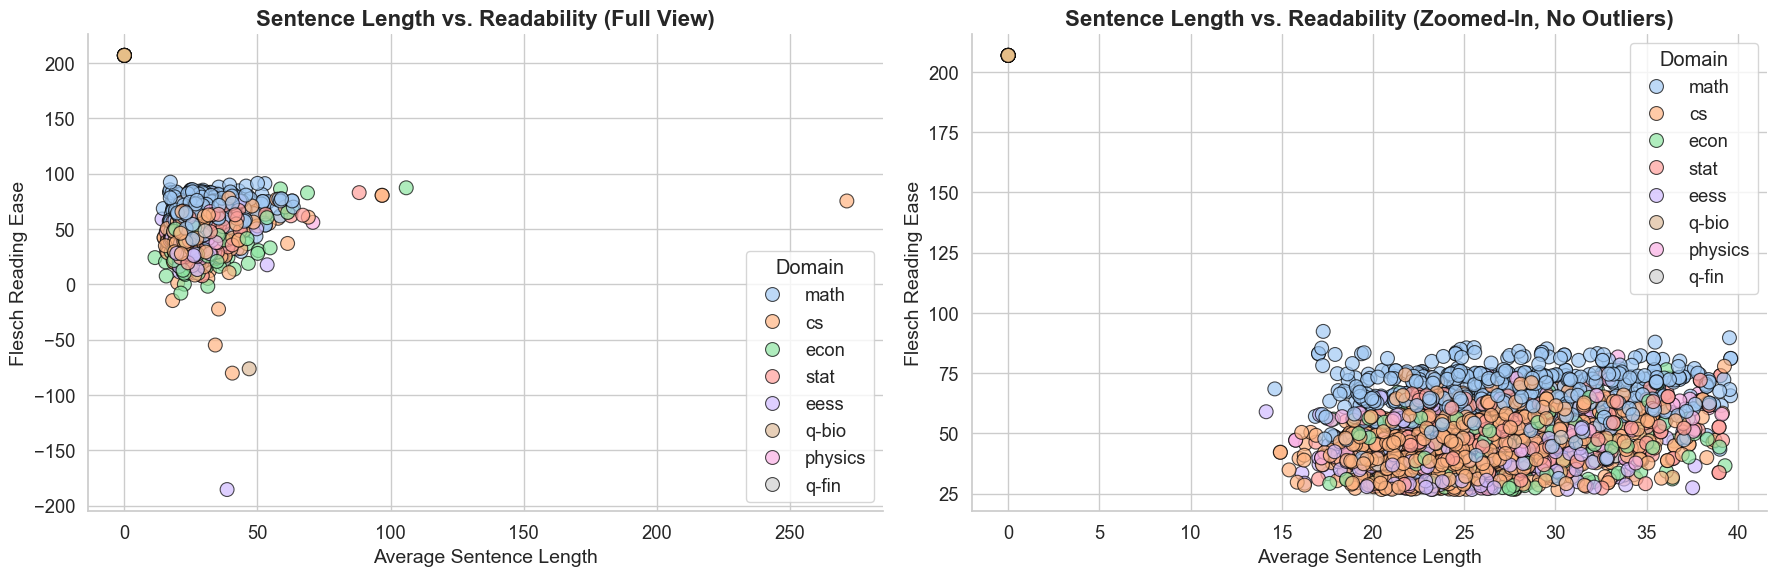

In [66]:
# Set up figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

### **Panel 1: Full scatter plot (Zoomed Out, Including Outliers)**
ax1 = sns.scatterplot(
    data=data, x="avg_sentence_length", y="flesch_reading_ease", hue="domain", alpha=0.7, s=100, edgecolor="black", ax=axes[0]
)
ax1.set_title("Sentence Length vs. Readability (Full View)", fontsize=16, weight='bold')
ax1.set_xlabel("Average Sentence Length", fontsize=14)
ax1.set_ylabel("Flesch Reading Ease", fontsize=14)
ax1.legend(title="Domain", loc="best")
sns.despine()

### **Panel 2: Zoomed-in scatter plot (Without Outliers)**
# Define reasonable limits (adjust as needed)
sentence_length_upper = data["avg_sentence_length"].quantile(0.95)  # 95th percentile cutoff
readability_lower = data["flesch_reading_ease"].quantile(0.05)  # 5th percentile cutoff

filtered_data = data[
    (data["avg_sentence_length"] <= sentence_length_upper) & (data["flesch_reading_ease"] >= readability_lower)
]

ax2 = sns.scatterplot(
    data=filtered_data, x="avg_sentence_length", y="flesch_reading_ease", hue="domain", alpha=0.7, s=100, edgecolor="black", ax=axes[1]
)
ax2.set_title("Sentence Length vs. Readability (Zoomed-In, No Outliers)", fontsize=16, weight='bold')
ax2.set_xlabel("Average Sentence Length", fontsize=14)
ax2.set_ylabel("Flesch Reading Ease", fontsize=14)
ax2.legend(title="Domain", loc="best")
sns.despine()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()